In [2]:
# Import libraries

import pandas as pd
import numpy as np

import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


os.getcwd()
os.chdir('C:\Lecture10')
# os.chdir('C:\Ipsita-AI-2023\ANOVA-Test-COVID-19')

In [3]:
#Load data
StatewiseTestingDetails=pd.read_csv('./StatewiseTestingDetails.csv')
population_india_census2011=pd.read_csv('./population_india_census2011.csv')

In [4]:
population_india_census2011.head()

,Sno,State,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [5]:
StatewiseTestingDetails.head()

,Date,State,TotalSamples,Negative,Positive
0,17-04-2020,Andaman and Nicobar Islands,1403,1210.0,12.0
1,24-04-2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27-04-2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01-05-2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,02-04-2020,Andhra Pradesh,1800,1175.0,132.0


In [6]:
StatewiseTestingDetails['Positive'].sort_values().head()

510    0.0
501    0.0
502    0.0
503    0.0
504    0.0
Name: Positive, dtype: float64

In [7]:
#List down the states which have 0 corona cases
StatewiseTestingDetails['State'][StatewiseTestingDetails['Positive']==0].unique()

array(['Nagaland', 'Sikkim'], dtype=object)

In [8]:
#List down the states which have 1 corona cases
StatewiseTestingDetails['State'][StatewiseTestingDetails['Positive']==1].unique()

array(['Arunachal Pradesh', 'Mizoram'], dtype=object)

In [10]:
##We see that there're many entries with 0. That means no case has been detected. So we can add 1 in all entries.
#So while perfroming any sort of Data transformation that involves log in it , won't give error.
StatewiseTestingDetails['Positive']=StatewiseTestingDetails['Positive']+1
print(StatewiseTestingDetails['Positive'])

0        14.0
1        29.0
2        35.0
3        35.0
4       134.0
        ...  
754     760.0
755       NaN
756     797.0
757     924.0
758    1261.0
Name: Positive, Length: 759, dtype: float64


In [12]:
StatewiseTestingDetails['Positive'].sort_values()

510    2.0
501    2.0
502    2.0
503    2.0
504    2.0
      ... 
731    NaN
732    NaN
733    NaN
734    NaN
755    NaN
Name: Positive, Length: 759, dtype: float64

In [13]:
#Imput missing values by median of each state
stateMedianData=StatewiseTestingDetails.groupby('State')[['Positive']].median().\
                                    reset_index().rename(columns={'Positive':'Median'})
stateMedianData.head()

,State,Median
0,Andaman and Nicobar Islands,32.0
1,Andhra Pradesh,815.0
2,Arunachal Pradesh,4.0
3,Assam,36.0
4,Bihar,107.5


In [14]:
StatewiseTestingDetails.head()

,Date,State,TotalSamples,Negative,Positive
0,17-04-2020,Andaman and Nicobar Islands,1403,1210.0,14.0
1,24-04-2020,Andaman and Nicobar Islands,2679,NaN,29.0
2,27-04-2020,Andaman and Nicobar Islands,2848,NaN,35.0
3,01-05-2020,Andaman and Nicobar Islands,3754,NaN,35.0
4,02-04-2020,Andhra Pradesh,1800,1175.0,134.0


In [21]:
for index,row in StatewiseTestingDetails.iterrows():
    if pd.isnull(row['Positive']):
        StatewiseTestingDetails['Positive'][index]=int(stateMedianData['Median'][stateMedianData['State']==row['State']])
        

In [22]:
StatewiseTestingDetails['Positive'].sort_values()

510        2.0
501        2.0
502        2.0
503        2.0
504        2.0
        ...   
456    10500.0
457    11508.0
458    12298.0
459    12976.0
460    14543.0
Name: Positive, Length: 759, dtype: float64

In [24]:
#Merge StatewiseTestingDetails & population_india_census2011 dataframes
data=pd.merge(StatewiseTestingDetails,population_india_census2011,on='State')
print(data)

           Date                        State  TotalSamples  Negative   
0    17-04-2020  Andaman and Nicobar Islands          1403    1210.0  \
1    24-04-2020  Andaman and Nicobar Islands          2679       NaN   
2    27-04-2020  Andaman and Nicobar Islands          2848       NaN   
3    01-05-2020  Andaman and Nicobar Islands          3754       NaN   
4    02-04-2020               Andhra Pradesh          1800    1175.0   
..          ...                          ...           ...       ...   
751  30-04-2020                  West Bengal         16525       NaN   
752  01-05-2020                  West Bengal         18566       NaN   
753  02-05-2020                  West Bengal         20976       NaN   
754  03-05-2020                  West Bengal         22915       NaN   
755  04-05-2020                  West Bengal         25116       NaN   

     Positive  Sno  Population  Rural population  Urban population   
0        14.0   34      380581            237093            14348

In [25]:
##Sort the Data Frame
data['Positive'].sort_values()

510        2.0
501        2.0
502        2.0
503        2.0
504        2.0
        ...   
456    10500.0
457    11508.0
458    12298.0
459    12976.0
460    14543.0
Name: Positive, Length: 756, dtype: float64

In [27]:
#Write a function to create densityGroup bucket 
def densityCheck(data):
    data['density_Group']=0
    for index,row in data.iterrows():
        status=None
        i=row['Density'].split('/')[0]
        try:
            if (',' in i):
                i=int(i.split(',')[0]+i.split(',')[1])
            elif ('.' in i):
                i=round(float(i))
            else:
                i=int(i)
        except ValueError as err:
            pass
        try:
            if (0<i<=300):
                status='Dense1'
            elif (300<i<=600):
                status='Dense2'
            elif (600<i<=900):
                status='Dense3'
            else:
                status='Dense4'
        except ValueError as err:
            pass
        data['density_Group'].iloc[index]=status
    return data  
print(data)
    


           Date                        State  TotalSamples  Negative   
0    17-04-2020  Andaman and Nicobar Islands          1403    1210.0  \
1    24-04-2020  Andaman and Nicobar Islands          2679       NaN   
2    27-04-2020  Andaman and Nicobar Islands          2848       NaN   
3    01-05-2020  Andaman and Nicobar Islands          3754       NaN   
4    02-04-2020               Andhra Pradesh          1800    1175.0   
..          ...                          ...           ...       ...   
751  30-04-2020                  West Bengal         16525       NaN   
752  01-05-2020                  West Bengal         18566       NaN   
753  02-05-2020                  West Bengal         20976       NaN   
754  03-05-2020                  West Bengal         22915       NaN   
755  04-05-2020                  West Bengal         25116       NaN   

     Positive  Sno  Population  Rural population  Urban population   
0        14.0   34      380581            237093            14348

In [28]:
data.columns


Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive', 'Sno',
       'Population', 'Rural population', 'Urban population', 'Area', 'Density',
       'Gender Ratio'],
      dtype='object')

In [29]:
data['Positive'].sort_values()

510        2.0
501        2.0
502        2.0
503        2.0
504        2.0
        ...   
456    10500.0
457    11508.0
458    12298.0
459    12976.0
460    14543.0
Name: Positive, Length: 756, dtype: float64

In [32]:
#Map each state as per its density group
data=densityCheck(data)

#We'll export this data so we can use it for Two - way ANOVA test.
stateDensity=data[['State','density_Group']].drop_duplicates().sort_values(by='State')
print(stateDensity)


C:\Users\Zahid\AppData\Local\Temp\ipykernel_4868\2742672746.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['density_Group'].iloc[index]=status


                           State density_Group
0    Andaman and Nicobar Islands        Dense1
4                 Andhra Pradesh        Dense2
31             Arunachal Pradesh        Dense1
47                         Assam        Dense2
66                         Bihar        Dense4
96                    Chandigarh        Dense4
123                 Chhattisgarh        Dense1
147                        Delhi        Dense4
173                          Goa        Dense2
196                      Gujarat        Dense2
222                      Haryana        Dense2
251             Himachal Pradesh        Dense1
277            Jammu and Kashmir        Dense1
303                    Jharkhand        Dense2
325                    Karnataka        Dense2
355                       Kerala        Dense3
390                       Ladakh        Dense1
402               Madhya Pradesh        Dense1
431                  Maharashtra        Dense2
461                    Meghalaya        Dense1
477          

In [33]:
data['Positive'].sort_values()

510        2.0
501        2.0
502        2.0
503        2.0
504        2.0
        ...   
456    10500.0
457    11508.0
458    12298.0
459    12976.0
460    14543.0
Name: Positive, Length: 756, dtype: float64

In [34]:
data.to_csv('data.csv',index=False)
stateDensity.to_csv('stateDensity.csv',index=False)


In [35]:
data.head()

,Date,State,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio,density_Group
0,17-04-2020,Andaman and Nicobar Islands,1403,1210.0,14.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
1,24-04-2020,Andaman and Nicobar Islands,2679,NaN,29.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
2,27-04-2020,Andaman and Nicobar Islands,2848,NaN,35.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
3,01-05-2020,Andaman and Nicobar Islands,3754,NaN,35.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
4,02-04-2020,Andhra Pradesh,1800,1175.0,134.0,10,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993,Dense2


In [36]:
data.describe()

,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Gender Ratio
count,756.000000,622.000000,756.000000,756.000000,7.560000e+02,7.560000e+02,7.560000e+02,756.000000
mean,20809.206349,21024.863344,766.484127,15.423280,4.389466e+07,3.026369e+07,1.363096e+07,945.236772
std,30018.538287,30070.735073,1543.937276,9.688974,4.511697e+07,3.414342e+07,1.372764e+07,54.704173
min,58.000000,0.000000,2.000000,1.000000,2.740000e+05,2.899100e+04,1.434880e+05,818.000000
25%,2367.250000,2482.250000,35.000000,7.000000,6.864602e+06,2.627208e+06,1.026459e+06,918.000000
50%,8538.000000,8303.000000,214.000000,15.000000,3.120558e+07,1.960796e+07,9.620624e+06,948.000000
75%,24989.750000,24500.250000,727.250000,24.000000,6.854844e+07,3.746934e+07,2.006940e+07,976.000000
max,175323.000000,162349.000000,14543.000000,35.000000,1.998123e+08,1.553173e+08,5.081826e+07,1084.000000


In [38]:
#Rearrange dataframe

df=pd.DataFrame({'Dense1':data[data['density_Group']=='Dense1']['Positive'],
                 'Dense2':data[data['density_Group']=='Dense2']['Positive'],
                 'Dense3':data[data['density_Group']=='Dense3']['Positive'],
                 'Dense4':data[data['density_Group']=='Dense4']['Positive']})

print(df)



     Dense1  Dense2  Dense3  Dense4
0      14.0     NaN     NaN     NaN
1      29.0     NaN     NaN     NaN
2      35.0     NaN     NaN     NaN
3      35.0     NaN     NaN     NaN
4       NaN   134.0     NaN     NaN
..      ...     ...     ...     ...
751     NaN     NaN     NaN   760.0
752     NaN     NaN     NaN   409.0
753     NaN     NaN     NaN   797.0
754     NaN     NaN     NaN   924.0
755     NaN     NaN     NaN  1261.0

[756 rows x 4 columns]


In [39]:
data.isna().sum()

Date                  0
State                 0
TotalSamples          0
Negative            134
Positive              0
Sno                   0
Population            0
Rural population      0
Urban population      0
Area                  0
Density               0
Gender Ratio          0
density_Group         0
dtype: int64

In [41]:
data[data['Positive'].isna()]
print(data)

           Date                        State  TotalSamples  Negative   
0    17-04-2020  Andaman and Nicobar Islands          1403    1210.0  \
1    24-04-2020  Andaman and Nicobar Islands          2679       NaN   
2    27-04-2020  Andaman and Nicobar Islands          2848       NaN   
3    01-05-2020  Andaman and Nicobar Islands          3754       NaN   
4    02-04-2020               Andhra Pradesh          1800    1175.0   
..          ...                          ...           ...       ...   
751  30-04-2020                  West Bengal         16525       NaN   
752  01-05-2020                  West Bengal         18566       NaN   
753  02-05-2020                  West Bengal         20976       NaN   
754  03-05-2020                  West Bengal         22915       NaN   
755  04-05-2020                  West Bengal         25116       NaN   

     Positive  Sno  Population  Rural population  Urban population   
0        14.0   34      380581            237093            14348

In [42]:
df.dtypes

Dense1    float64
Dense2    float64
Dense3    float64
Dense4    float64
dtype: object

In [30]:
####################### Approach 1.##########3

In [43]:
np.random.seed(1234)
dataNew=pd.DataFrame({'Dense1':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
                      'Dense2':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
                      'Dense3':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
                      'Dense4':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10)})
print(dataNew)

   Dense1  Dense2  Dense3  Dense4
0    14.0    44.0    39.0     4.0
1  2668.0   616.0    14.0     2.0
2    19.0     3.0    58.0    50.0
3   302.0    14.0    45.0     3.0
4     4.0  1890.0  2562.0    54.0
5    38.0    48.0   531.0    59.0
6  1284.0     3.0    40.0    56.0
7     3.0   798.0     3.0     2.0
8   429.0    49.0    41.0   849.0
9    37.0    85.0  1737.0     2.0


In [32]:
# np.random.seed(1234)
# dataNew=pd.DataFrame({'Dense1':data['Positive'][data['density_Group']=='Dense1'],
#                       'Dense2':data['Positive'][data['density_Group']=='Dense1'],
#                       'Dense3':data['Positive'][data['density_Group']=='Dense1'],
#                       'Dense4':data['Positive'][data['density_Group']=='Dense1']})

In [44]:
dataNew.head()

,Dense1,Dense2,Dense3,Dense4
0,14.0,44.0,39.0,4.0
1,2668.0,616.0,14.0,2.0
2,19.0,3.0,58.0,50.0
3,302.0,14.0,45.0,3.0
4,4.0,1890.0,2562.0,54.0


In [45]:
dataNew.describe()

,Dense1,Dense2,Dense3,Dense4
count,10.000000,10.000000,10.000000,10.000000
mean,479.800000,355.000000,507.000000,108.100000
std,865.604452,609.388582,900.794711,261.622056
min,3.000000,3.000000,3.000000,2.000000
25%,15.250000,21.500000,39.250000,2.250000
50%,37.500000,48.500000,43.000000,27.000000
75%,397.250000,483.250000,412.750000,55.500000
max,2668.000000,1890.000000,2562.000000,849.000000


In [46]:
dataNew['Dense1'].sort_values().head()

7     3.0
4     4.0
0    14.0
2    19.0
9    37.0
Name: Dense1, dtype: float64

In [47]:
dataNew.describe()

,Dense1,Dense2,Dense3,Dense4
count,10.000000,10.000000,10.000000,10.000000
mean,479.800000,355.000000,507.000000,108.100000
std,865.604452,609.388582,900.794711,261.622056
min,3.000000,3.000000,3.000000,2.000000
25%,15.250000,21.500000,39.250000,2.250000
50%,37.500000,48.500000,43.000000,27.000000
75%,397.250000,483.250000,412.750000,55.500000
max,2668.000000,1890.000000,2562.000000,849.000000


In [48]:
dataNew['Dense1'].sort_values().head()

7     3.0
4     4.0
0    14.0
2    19.0
9    37.0
Name: Dense1, dtype: float64

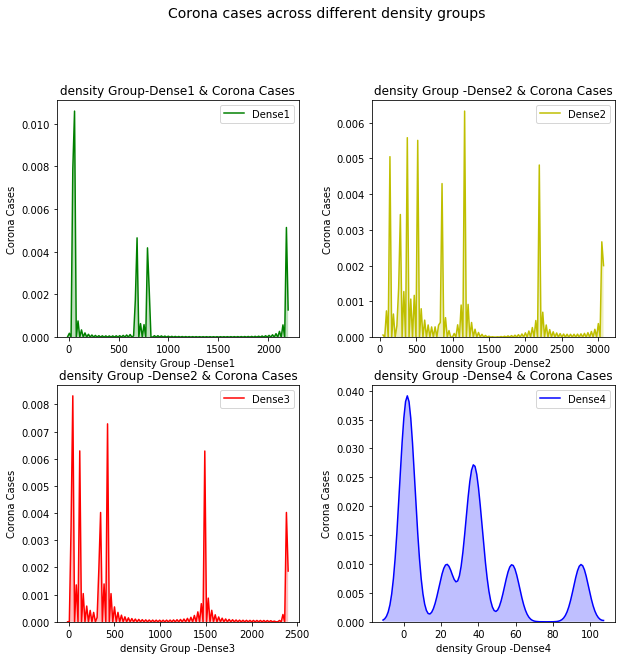

In [38]:
#Plot number of Corona cases across different density groups to check their distribution.
fig = plt.figure(figsize=(10,10))
title = fig.suptitle("Corona cases across different density groups", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("density Group-Dense1 & Corona Cases")
ax1.set_xlabel("density Group -Dense1")
ax1.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True,bw=4, color='g')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense2")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense2'], ax=ax2, shade=True,bw=4, color='y')

ax2 = fig.add_subplot(2,2,3)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense3")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense3'], ax=ax2, shade=True,bw=4, color='r')

ax2 = fig.add_subplot(2,2,4)
ax2.set_title("density Group -Dense4 & Corona Cases")
ax2.set_xlabel("density Group -Dense4")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense4'], ax=ax2, shade=True,bw=4, color='b')

In [49]:
## Apply BoxCox Transformation to bring the data to close to Gaussian Distribution 
dataNew['Dense1'],fitted_lambda = stats.boxcox(dataNew['Dense1'])
dataNew['Dense2'],fitted_lambda = stats.boxcox(dataNew['Dense2'])
dataNew['Dense3'],fitted_lambda = stats.boxcox(dataNew['Dense3'])
dataNew['Dense4'],fitted_lambda = stats.boxcox(dataNew['Dense4'])

In [40]:
##Apply log transformation to treat outliers and to bring to normal distribution
# dataNew = np.log(dataNew + 1)

In [50]:
dataNew.describe()

,Dense1,Dense2,Dense3,Dense4
count,10.000000,10.000000,10.000000,10.000000
mean,3.534166,3.933384,3.530316,1.966137
std,1.758183,2.036816,1.405578,1.245274
min,1.058439,1.086272,1.046121,0.652797
25%,2.478163,2.836553,3.126099,0.739487
50%,3.210827,3.730362,3.190649,2.032306
75%,4.905425,5.573627,4.447578,2.885632
max,6.100311,6.987236,5.631101,3.960724


In [42]:
dataNew.head()

,Dense1,Dense2,Dense3,Dense4
0,5.089940,10.470520,6.816592,5.316842
1,3.507428,5.834316,0.702392,5.260163
2,2.320648,7.220173,1.121958,0.744038
3,3.405425,8.909784,3.871437,1.230105
4,2.104378,4.563609,8.422814,6.292992


In [51]:
dataNew['Dense1'].describe()

count    10.000000
mean      3.534166
std       1.758183
min       1.058439
25%       2.478163
50%       3.210827
75%       4.905425
max       6.100311
Name: Dense1, dtype: float64

C:\Users\Zahid\AppData\Local\Temp\ipykernel_4868\3688102872.py:10: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True,bw=4, color='g')
C:\Users\Zahid\AppData\Local\Temp\ipykernel_4868\3688102872.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True,bw=4, color='g')
C:\Users\Zahid\AppData\Local\Temp\ipykernel_4868\3688102872.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=4`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(dataNew['Dense2'], ax=ax2, shade=Tr

<Axes: title={'center': 'density Group -Dense4 & Corona Cases'}, xlabel='density Group -Dense4', ylabel='Corona Cases'>

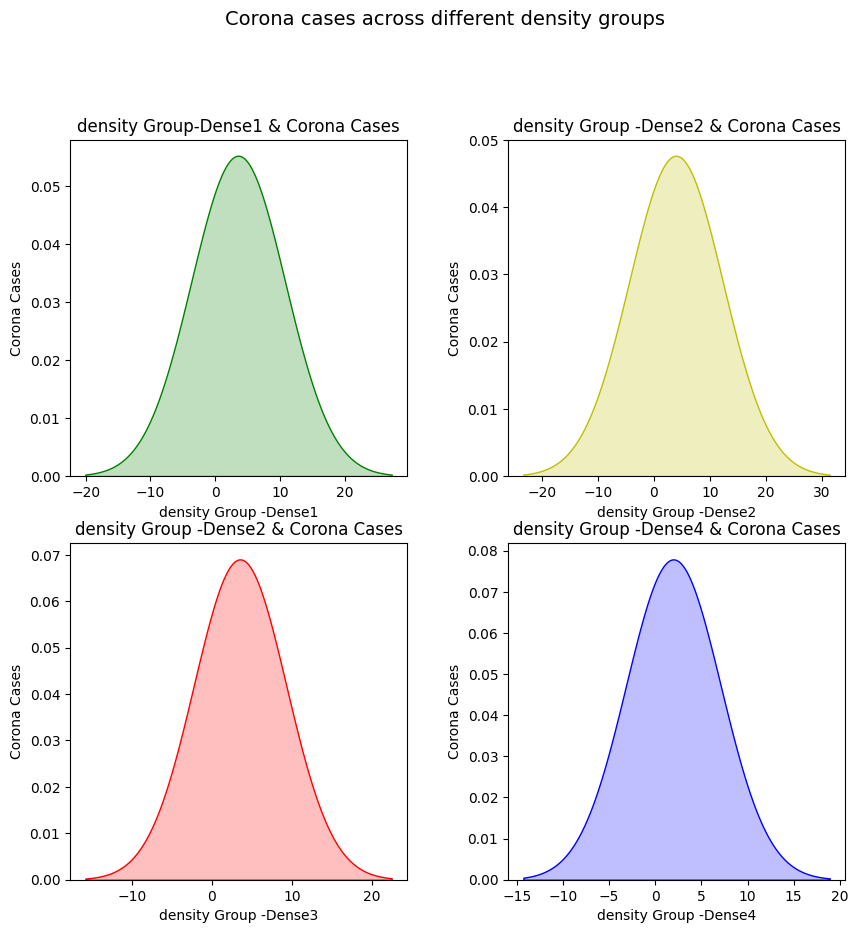

In [52]:
#Plot different density groups
fig = plt.figure(figsize=(10,10))
title = fig.suptitle("Corona cases across different density groups", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("density Group-Dense1 & Corona Cases")
ax1.set_xlabel("density Group -Dense1")
ax1.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True,bw=4, color='g')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense2")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense2'], ax=ax2, shade=True,bw=4, color='y')

ax2 = fig.add_subplot(2,2,3)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense3")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense3'], ax=ax2, shade=True,bw=4, color='r')

ax2 = fig.add_subplot(2,2,4)
ax2.set_title("density Group -Dense4 & Corona Cases")
ax2.set_xlabel("density Group -Dense4")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense4'], ax=ax2, shade=True,bw=4, color='b')

In [53]:
##############Assumptions check - Normality
stats.shapiro(dataNew['Dense1'])

ShapiroResult(statistic=0.9425049424171448, pvalue=0.5812087059020996)

In [54]:
stats.shapiro(dataNew['Dense2'])

ShapiroResult(statistic=0.930978536605835, pvalue=0.45758628845214844)

In [55]:
stats.shapiro(dataNew['Dense3'])

ShapiroResult(statistic=0.9177395701408386, pvalue=0.338487446308136)

In [56]:
stats.shapiro(dataNew['Dense4'])


ShapiroResult(statistic=0.8361213207244873, pvalue=0.03964199125766754)

In [57]:
# Levene variance test  
stats.levene(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])

LeveneResult(statistic=0.641098393756367, pvalue=0.5935697080036051)

In [50]:
##p-value is more than 0.05 , So we can say that variances among groups are equal.

In [58]:
F, p = stats.f_oneway(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])
print('F statistic =', F, 'p value :',p)

F statistic = 2.8166230400581824 p value : 0.05280806346826715


In [59]:
F, p = stats.f_oneway(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=2.817, p=0.053


In [61]:
#Rearrange DataFrame
newDf=dataNew.stack().to_frame().reset_index().rename(columns={'level_1':'density_Group',
                                                               0:'Count'})
del newDf['level_0']
print(newDf)


   density_Group     Count
0         Dense1  2.415060
1         Dense2  3.640431
2         Dense3  3.121550
3         Dense4  1.231096
4         Dense1  6.100311
5         Dense2  6.016371
6         Dense3  2.349449
7         Dense4  0.652797
8         Dense1  2.667472
9         Dense2  1.086272
10        Dense3  3.402063
11        Dense4  2.833516
12        Dense1  4.729240
13        Dense2  2.568594
14        Dense3  3.223848
15        Dense4  0.999555
16        Dense1  1.322739
17        Dense2  6.987236
18        Dense3  5.631101
19        Dense4  2.872094
20        Dense1  3.221240
21        Dense2  3.720844
22        Dense3  4.796083
23        Dense4  2.915846
24        Dense1  5.662594
25        Dense2  1.086272
26        Dense3  3.139745
27        Dense4  2.890144
28        Dense1  1.058439
29        Dense2  6.242542
30        Dense3  1.046121
31        Dense4  0.652797
32        Dense1  4.964154
33        Dense2  3.739879
34        Dense3  3.157450
35        Dense4  3.960724
3

In [62]:
################ using Ols Model
model = ols('Count ~ C(density_Group)', newDf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.817
Date:                Mon, 12 Jun 2023   Prob (F-statistic):             0.0528
Time:                        11:10:11   Log-Likelihood:                -74.453
No. Observations:                  40   AIC:                             156.9
Df Residuals:                      36   BIC:                             163.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.5342      0.519      6.812      0.000       2.482       4.586
C(density_Group)[T.Dense2]     0.3992      0.734      0.544      0.590      -1.089       1.887
C(density_Group)[T.Dense3]    -0.0039      0.734     -0.005      0.996      -1.492       1.484
C(density_Group)[T.Dense4]    -1.5680      0.734     -2.137      0.039      -3.056      -0.080
==============================================================================
Omnibus:                        1.926   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.196
Skew:                           0.054   Prob(JB):                        0.550
Kurtosis:                       2.160   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 36) =  2.817, p =  0.0528


In [64]:
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(density_Group),22.743216,3.0,2.816623,0.052808
Residual,96.895677,36.0,NaN,NaN


In [56]:
#The F-statistic= 76.48 and the p-value= 8.557817e-33 which is indicating that there is an overall significant 
#effect of density_Group on corona positive cases. However, we don’t know where the difference between desnity_groups is yet.
# This is in the post-hoc section. 

#So Based on p-value we can reject the H0; that is there's no significant difference as per density of an area 
#and number of corona cases

In [57]:
#So what if you find statistical significance?  Multiple comparison tests

#When you conduct an ANOVA, you are attempting to determine if there is a statistically significant difference among the groups.
#If you find that there is a difference, you will then need to examine where the group differences lay.

In [65]:
newDf.dtypes

density_Group     object
Count            float64
dtype: object

In [66]:
newDf.head()

,density_Group,Count
0,Dense1,2.415060
1,Dense2,3.640431
2,Dense3,3.121550
3,Dense4,1.231096
4,Dense1,6.100311


In [67]:
#Post hoc test
mc = statsmodels.stats.multicomp.MultiComparison(newDf['Count'],newDf['density_Group'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Dense1 Dense2   0.3992 0.9475 -1.5768 2.3752  False
Dense1 Dense3  -0.0039    1.0 -1.9799 1.9722  False
Dense1 Dense4   -1.568 0.1609  -3.544  0.408  False
Dense2 Dense3  -0.4031 0.9461 -2.3791 1.5729  False
Dense2 Dense4  -1.9672 0.0514 -3.9433 0.0088  False
Dense3 Dense4  -1.5642 0.1625 -3.5402 0.4118  False
---------------------------------------------------


In [61]:
#tuckey HSD test clearly says that there's a significant difference between Group1 & Group4

In [62]:
#Above results from Tukey HSD suggests that except Dense1-Dense4 groups, all other pairwise comparisons for number of 
#corona cases rejects null hypothesis and indicates statistical significant differences.

In [68]:
### Normality Assumption check
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9636122584342957 0.22215929627418518


In [69]:
#Homogeneity of variances Assumption check
w, pvalue = stats.bartlett(newDf['Count'][newDf['density_Group']=='Dense1'], newDf['Count'][newDf['density_Group']=='Dense2']
                           , newDf['Count'][newDf['density_Group']=='Dense3'], newDf['Count'][newDf['density_Group']=='Dense4'])
print(w, pvalue)

2.490361290659014 0.47703553271440635


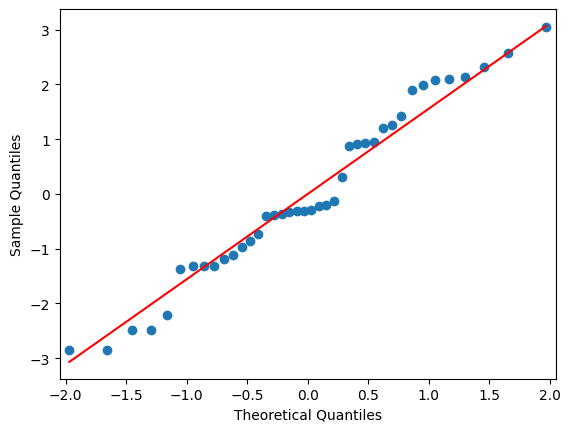

In [70]:
## Q-Q Plot for Normal Distribution check-
#Check the Normal distribution of residuals
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()